In [4]:
# Step 1: Import required libraries
# These libraries help in data handling, visualization, and model training.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
# Step 2: Load the Iris dataset
# We use only 2 features to allow 2D visualization of decision boundaries.

iris = load_iris()
X = iris.data[:, :2]   # Taking only first two features: sepal length & sepal width
y = iris.target

# Display shape and target names
print("Features shape:", X.shape)
print("Target classes:", iris.target_names)


Features shape: (150, 2)
Target classes: ['setosa' 'versicolor' 'virginica']


In [8]:
# Step 3: Normalize the features
# KNN uses Euclidean distance, so we scale features to ensure fairness.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Step 4: Train-test split
# We split the dataset to evaluate performance on unseen data.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# Step 5: Train a basic KNN model with k=5
# This is the base model to see how KNN performs on Iris.

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [14]:
#  Step 6: Evaluate the model
# Accuracy, confusion matrix and classification report help assess performance.

print("Accuracy with k=5:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy with k=5: 0.7666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  4  7]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.60      0.67      0.63         9
   virginica       0.70      0.64      0.67        11

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



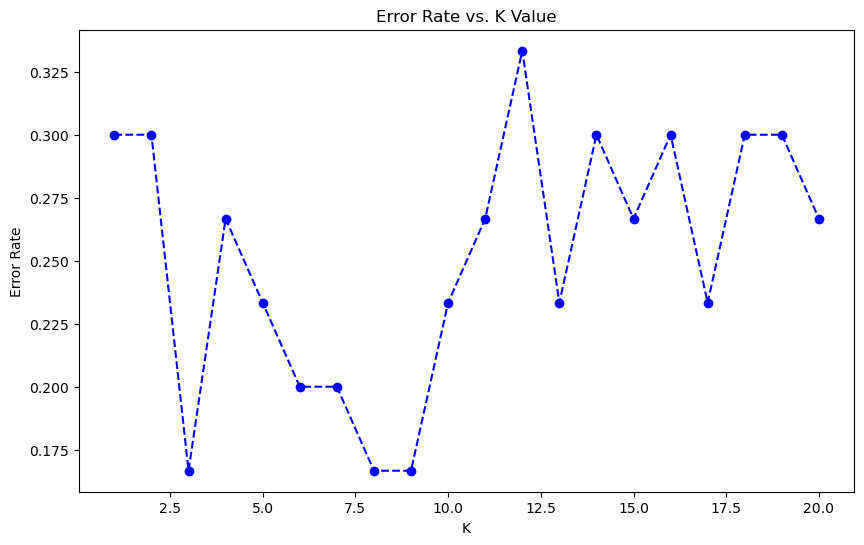

In [16]:
#  Step 7: Try different values of k (1 to 20)
# Helps identify the best number of neighbors (k) for highest accuracy.

error_rates = []

for k in range(1, 21):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)

# Plotting Error Rate vs K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, color='blue', linestyle='--', marker='o')
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()


In [ ]:
# Step 8: Visualize Decision Boundaries for best k
# Let's use k=8 and plot the classification boundaries.

best_k = 8
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_scaled, y)

# Create a mesh grid over feature space
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over mesh points
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.rainbow)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.rainbow)
plt.title(f"Decision Boundary with k={best_k}")
plt.xlabel("Sepal length (normalized)")
plt.ylabel("Sepal width (normalized)")
plt.show()
